# **Mount drive and import libraries**

*   mount drive with Google Colab and Get your Authentication Key
*   change directory to E2Edata folder







In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/E2Edata')  # Fix This if your file is in a Certain Directory in Your Drive

Mounted at /content/drive/


**Import important libraries**

In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from  sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## **Linear Regressors Models with kaggle_dataset**
1. Linear regression
2. Lasso regression
3. Ridge regression

# **Date Loading**
1.   Load The Data File namedd by 'Automobile.csv'
2.   preperaing Data
2.   Split Features and Labels
3.   Reshape Features for later Usage







In [ ]:
df=pd.read_csv('Automobile_data.csv')

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Count missing values in each column

In [ ]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Preparing the Data

Performed Data Cleaning and preparation to make the data ready for Linear Regression. Data Had some issues like :
1. Had some weird character “?” in some columns, needed to find and We replace "?" with NaN (Not a Number).
2. Deal with Missing Values :- Imputed Numeric Columns using Median and Categorical columns using Mode.
3. Converting Columns to correct Datatype :- The columns which had “?” were originally int but because of this weird characters they were present as Object.
4. Label Encoder :- To make the Data Numeric.
5. Sampling in Train and Test

In [ ]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Count missing values in each column

In [ ]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# Deal with missing data
drop data
1. drop the whole row
2. drop the whole column

or replace data
1. replace it by mean
2. replace it by frequency

In [ ]:
from sklearn.impute import SimpleImputer

1-Replace by mean:

"normalized-losses": 41 missing data, replace them with mean
"stroke": 4 missing data, replace them with mean
"bore": 4 missing data, replace them with mean
"horsepower": 2 missing data, replace them with mean
"peak-rpm": 2 missing data, replace them with mean

In [ ]:
#"normalized-losses": 41 missing data, replace them with mean
imputer = SimpleImputer(strategy='mean')
 imputer.fit_transform(df.bmi.values.reshape(-1, 1))

AttributeError: ignored

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df.children = imputer.fit_transform(df.children.values.reshape(-1, 1))
df.smoker = imputer.fit_transform(df.smoker.values.reshape(-1, 1))
df.region = imputer.fit_transform(df.region.values.reshape(-1, 1))

In [ ]:
x= df.iloc[:,0].values
y= df.iloc[:,1].values
x= x.reshape(-1,1)   # RESHAPED
print('The size of X :', x.shape )
print('The size Y :',  y.shape )

The size of X : (199, 57)
The size Y : (199,)


6. Data Visualization.

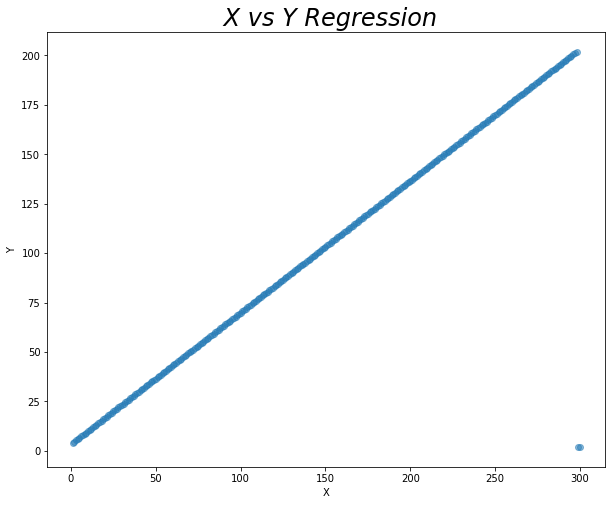

In [ ]:
plt.figure(figsize=(10,8))     # The Plotting Window Size
plt.title(' X vs Y Regression', fontsize=24 , fontstyle='italic')  # Title , Font size and Style
plt.scatter(x ,y , alpha =0.5, label='Y')  # NOTE : Make Sure  x , y IN Data Type ( Array )
plt.xlabel('X')
plt.ylabel('Y')
plt.show()   # Showing the Result of plotting

# **Data Spliting**

1.   Split training and Testing Data
2.   Stop the shuffle with Fix the Seed


In [ ]:
x_train,x_test,y_train , y_test = train_test_split(x,y , test_size =0.3 , shuffle=False , random_state=0  )

3. Check the Type and Size of the Arrays you created by Printing them

In [ ]:
print('The Features to be trained on :', x_train.shape )
print('The Labels to be trained on :',  y_train.shape )
print('The Features to be tested on :',  x_test.shape )
print('The Labels to be tested on :',  y_test.shape )
print('X_train type : ', type(x_train), 'X_test type :',type(x_test) ,'y_train type :', type(y_train), 'y_test type :', type(y_test) )

The Features to be trained on : (139, 64)
The Labels to be trained on : (139,)
The Features to be tested on : (60, 64)
The Labels to be tested on : (60,)
X_train type :  <class 'pandas.core.frame.DataFrame'> X_test type : <class 'pandas.core.frame.DataFrame'> y_train type : <class 'pandas.core.series.Series'> y_test type : <class 'pandas.core.series.Series'>


# **1- Using The Linear Regression Model**

1.1 :fit and predict Model

In [ ]:
lr=LinearRegression()
#Fit the Model to Training Set
lr.fit(x_train,y_train)
#Predict The Testing Set
lr_preds=lr.predict(x_test)


1.2 Evaluate the Model by R squared method between Preds and Actual Valuees

In [ ]:
r2_score(y_test , lr_preds)

0.9813872064975078
-0.3945038698565144


1.3 : Visualize The Model in a Good way

Text(0, 0.5, 'Y')

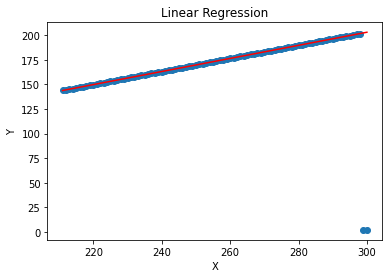

In [ ]:
plt.scatter(x_test ,y_test)
plt.plot(x_test, lr_preds , color = 'red' )
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')

**Enhanceing Linear Rregression Model usiong poly features and features Scalling**
1. Build a Code that Try 40 Degrees like from Degree 1 to 21 And Return The Best Degree with the Highest R Squared Value





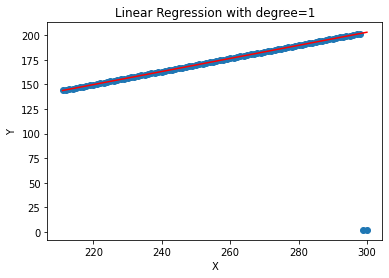

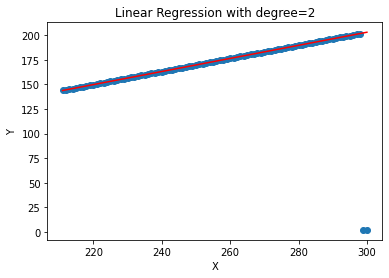

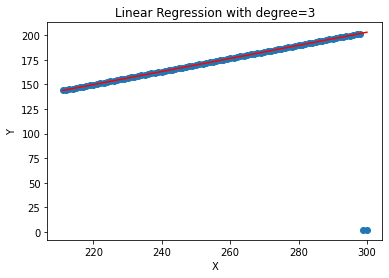

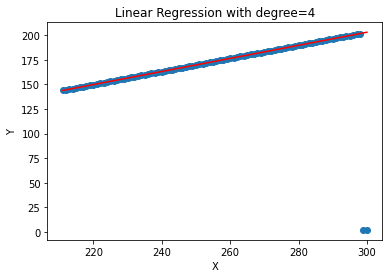

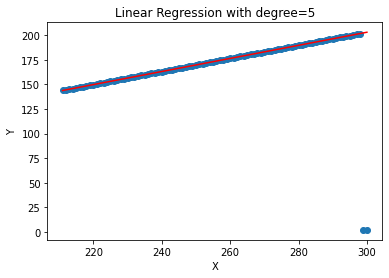

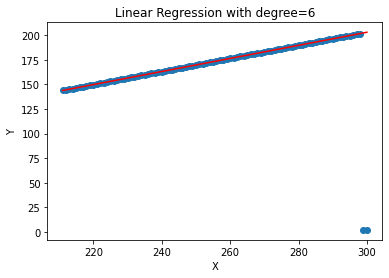

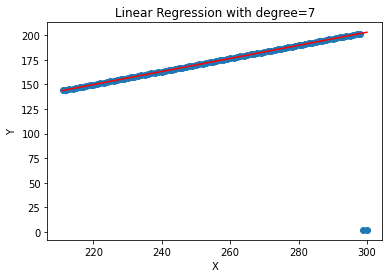

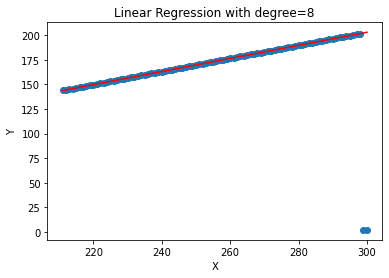

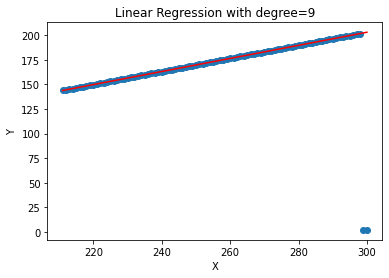

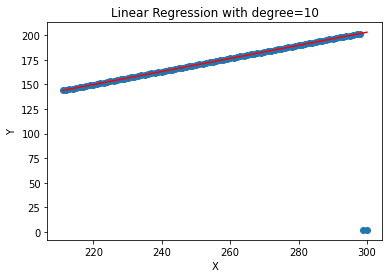

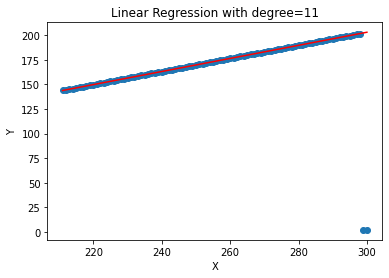

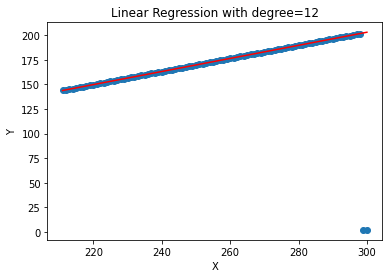

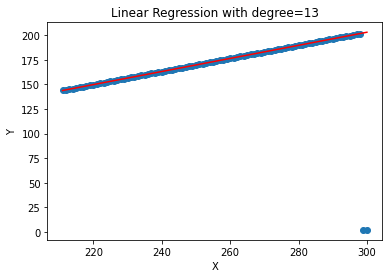

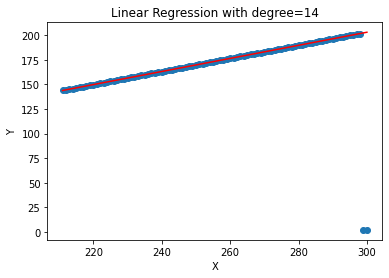

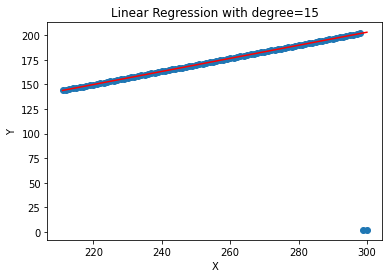

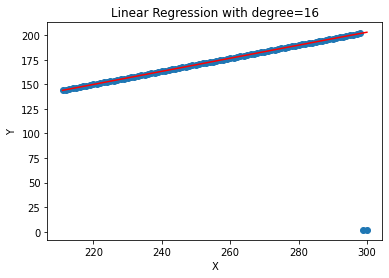

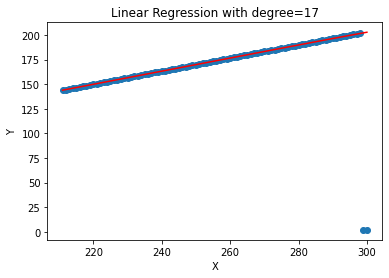

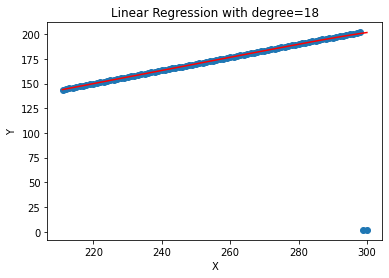

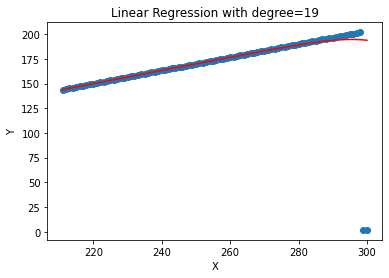

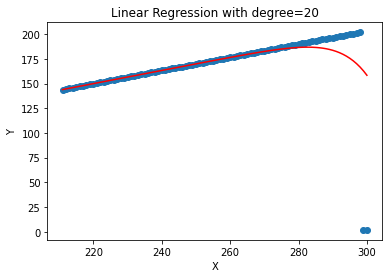

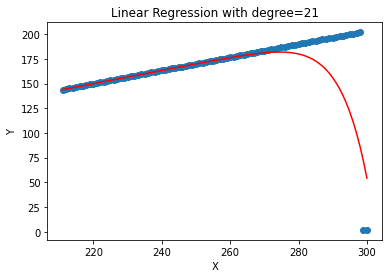

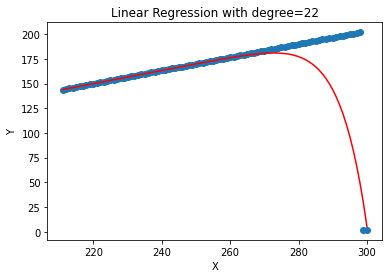

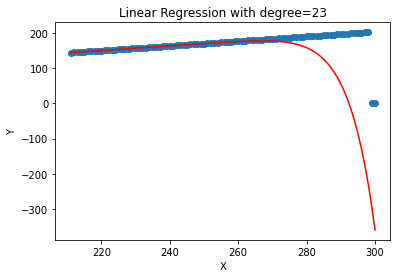

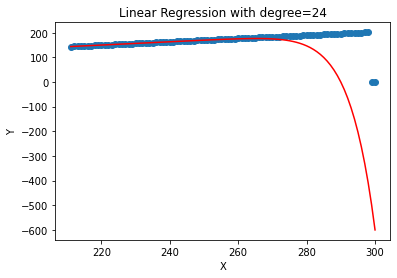

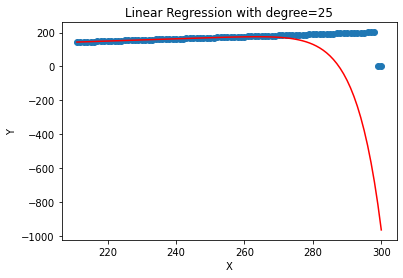

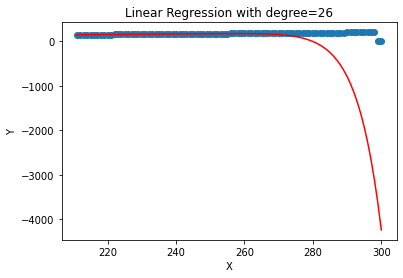

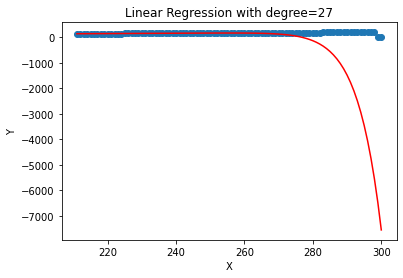

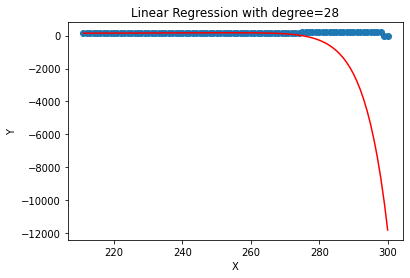

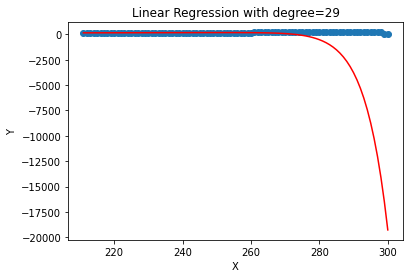

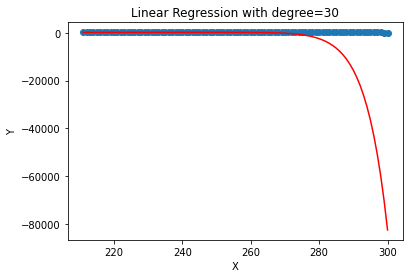

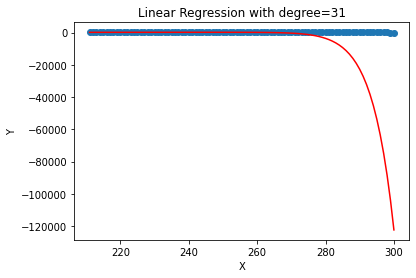

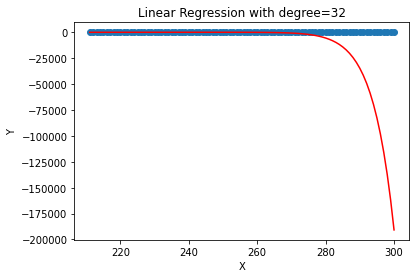

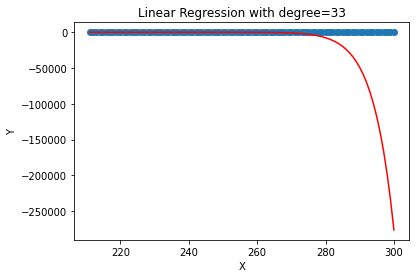

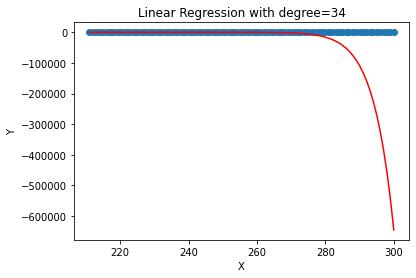

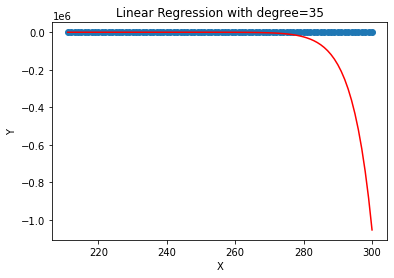

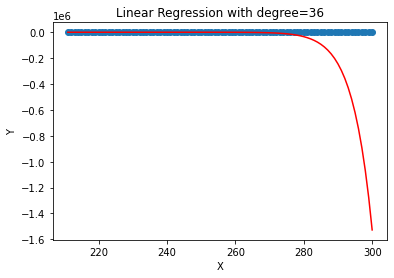

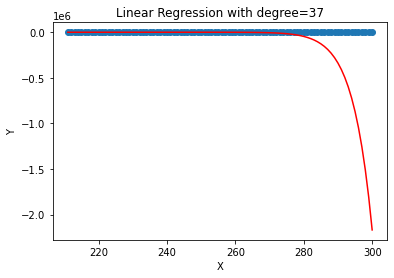

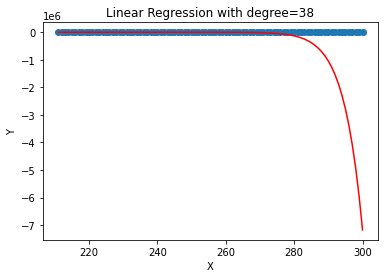

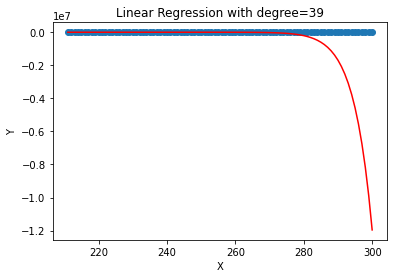

the Max R squared method is 0.3209132364155942
the best degree is 20


In [ ]:
RSS=[]
for deg in range(1,40):
    #Fit and Transform the Training Features into Poly Training Features
    poly=PolynomialFeatures(degree = deg)
    x_poly=poly.fit_transform(x_train)
    #Transfrom The Testing Features into Poly Testing Feature
    x_poly_test=poly.transform(x_test)
    # Feature Scaling
    sc = StandardScaler()
    x_poly = sc.fit_transform(x_poly)
    x_poly_test= sc.transform(x_poly_test)
    #Fit the Model to Training Set
    lp=LinearRegression()
    lp.fit(x_poly,y_train)
    #Predict The Testing Set
    lp_preds=lp.predict(x_poly_test)
    #Evaluate the Model by R squared method between Preds and Actual Valuees
    r2=r2_score(y_test , lp_preds)
    RSS.append(r2)
    plt.scatter(x_test ,y_test)
    plt.plot(x_test, lp_preds , color = 'red' )
    plt.title('Linear Regression with degree=%s'%deg)
    plt.xlabel('X')
    plt.ylabel('Y')
    #plt.plot(y_test ,'.', lp_preds,'-o')
    plt.show()
#The Best Degree with the Highest R Squared Value
max_value = max(RSS)
index = RSS.index(max(RSS))
print('the Max R squared method is' , max_value )
index_deg=index+1
print('the best degree is' ,index_deg )

In [ ]:
print('the Max R squared method is for linear regrassion' , max_value )
print('the best degree is' ,index_deg )

the Max R squared method is for linear regrassion 0.3209132364155942
the best degree is 20


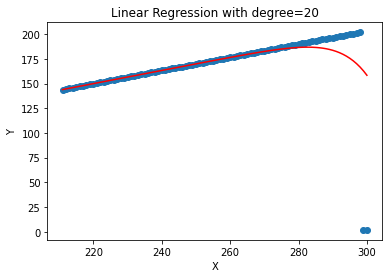

the Max R squared method for linear regression with poly features is 0.3209132364155942


In [ ]:
#Fit and Transform the Training Features into Poly Training Features
poly=PolynomialFeatures(degree = index_deg)
x_poly=poly.fit_transform(x_train)
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(x_test)
# Feature Scaling
sc = StandardScaler()
x_poly = sc.fit_transform(x_poly)
x_poly_test= sc.transform(x_poly_test)
#Fit the Model to Training Set
lp=LinearRegression()
lp.fit(x_poly,y_train)
#Predict The Testing Set
lp_preds=lp.predict(x_poly_test)
#plot
plt.scatter(x_test ,y_test)
plt.plot(x_test, lp_preds , color = 'red' )
plt.title('Linear Regression with degree=%s'%index_deg)
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(y_test ,'.', lp_preds,'-o')
plt.show()
#Evaluate the Model by R squared method between Preds and Actual Valuees
print('the Max R squared method for linear regression with poly features is' ,r2_score(y_test , lp_preds) )

# **2.Using Ridge Model**

 Set Range Of Alphas and Make A function to Select the Best One with resepct to R Squared Metric

In [ ]:
RS=[]
alpha=[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40, 45 , 50 , 55, 60]
for alp in alpha:
    #Fit and Transform the Training Features into Poly Training Features
    poly=PolynomialFeatures(degree = index_deg)
    x_poly=poly.fit_transform(x_train)
    #Transfrom The Testing Features into Poly Testing Feature
    x_poly_test=poly.transform(x_test)
    # Feature Scaling
    sc = StandardScaler()
    x_poly = sc.fit_transform(x_poly)
    x_poly_test= sc.transform(x_poly_test)
    #Fit the Model to Training Set
    rg=Ridge(alpha= alp)
    rg.fit(x_poly,y_train)
    #Predict The Testing Set
    rg_preds=rg.predict(x_poly_test)
    #Evaluate the Model by R squared method between Preds and Actual Valuees
    r2=r2_score(y_test , rg_preds)
    RS.append(r2)
    plt.scatter(x_test ,y_test)
    plt.plot(x_test, rg_preds , color = 'red' )
    plt.title('Rigde with Alpha=%s'%alp)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
#The Best Degree with the Highest R Squared Value
max_value = max(RS)
index_r = RS.index(max(RS))
print('the Max R squared method for Ridge is' , max_value )
print('the best alpha is' , alpha[index_r] )

0.9724210104177539
0.2454939290544358


In [ ]:
print('the Max R squared method  for Ridge is' , max_value )
print('the best alpha is' , alpha[index_r] )

the Max R squared method  for Ridge is 0.1615605213836775
the best alpha is 1e-05


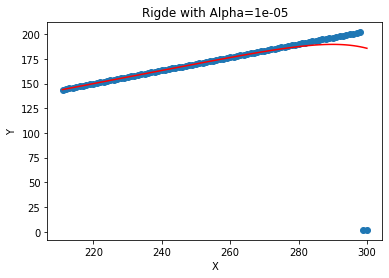

the Max R squared method for Ridge with poly features with degree=16 and alpha =1e-5 is 0.1615605213836775


In [ ]:
#Fit and Transform the Training Features into Poly Training Features
poly=PolynomialFeatures(degree = index_deg)
x_poly=poly.fit_transform(x_train)
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(x_test)
# Feature Scaling
sc = StandardScaler()
x_poly = sc.fit_transform(x_poly)
x_poly_test= sc.transform(x_poly_test)
#Fit the Model to Training Set
rg=Ridge(alpha= alpha[index_r] )
rg.fit(x_poly,y_train)
#Predict The Testing Set
rg_preds=rg.predict(x_poly_test)
#plot
plt.scatter(x_test ,y_test)
plt.plot(x_test, rg_preds , color = 'red' )
plt.title('Rigde with Alpha=%s'%alpha[index_r] )
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#Evaluate the Model by R squared method between Preds and Actual Valuees
print('the Max R squared method for Ridge with poly features with degree=16 and alpha =1e-5 is' ,r2_score(y_test , rg_preds) )

# **3.Using Lasso Model**

Set Range Of Alphas and Make A function to Select the Best One with resepct to R Squared Metric

In [ ]:
las=[]
coeff_matrix=[]
alpha=[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40 , 45 , 50 , 55 , 60]
for alp in alpha:
    #Fit and Transform the Training Features into Poly Training Features
    poly=PolynomialFeatures(degree = 20)
    x_poly=poly.fit_transform(x_train)
    #Transfrom The Testing Features into Poly Testing Feature
    x_poly_test=poly.transform(x_test)
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_poly = sc.fit_transform(x_poly)
    x_poly_test= sc.transform(x_poly_test)
    #Fit the Model to Training Set
    la=Lasso(alpha= alp)
    la.fit(x_poly,y_train)
    coeff_matrix.append(la.coef_)
    #Predict The Testing Set
    la_preds=la.predict(x_poly_test)
    #Evaluate the Model by R squared method between Preds and Actual Valuees
    r2=r2_score(y_test , la_preds)
    las.append(r2)
    plt.scatter(x_test ,y_test)
    plt.plot(x_test, la_preds , color = 'red' )
    plt.title('Lasso with Alpha=%s'%alp)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
#The Best Degree with the Highest R Squared Value
max_value = max(las)
index_l = las.index(max(las))
print('the Max R squared method for Lasso is' , max_value )
print('the best alpha is' , alpha[index_l] )

0.9805520655617251
0.19332846408335058


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+08, tolerance: 1.122e+06
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print('the Max R squared method for Lasso is' , max_value )
print('the best alpha is' , alpha[index_l] )

the Max R squared method for Lasso is 0.04394671257401317
the best alpha is 1


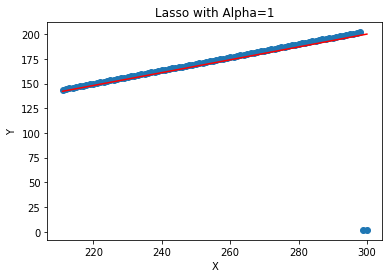

the Max R squared method for Lasso with poly features with degree=20 and alpha =1 is 0.04394671257401317


In [ ]:
#Fit and Transform the Training Features into Poly Training Features
poly=PolynomialFeatures(degree = index_deg)
x_poly=poly.fit_transform(x_train)
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(x_test)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_poly = sc.fit_transform(x_poly)
x_poly_test= sc.transform(x_poly_test)
#Fit the Model to Training Set
la=Lasso(alpha= alpha[index_l] )
la.fit(x_poly,y_train)
coeff_matrix.append(la.coef_)
#Predict The Testing Set
la_preds=la.predict(x_poly_test)
#plot
plt.scatter(x_test ,y_test)
plt.plot(x_test, la_preds , color = 'red' )
plt.title('Lasso with Alpha=%s'%alpha[index_l] )
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#Evaluate the Model by R squared method between Preds and Actual Valuees
print('the Max R squared method for Lasso with poly features with degree=20 and alpha =1 is' ,r2_score(y_test , la_preds))